<a href="https://colab.research.google.com/github/Funatlearn/langgraph101/blob/main/Agents/2_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chat Bot (incomplete)

Objectives:
1. Use different message types - HumanMmessage and AIessage
2. Mmaintain a full conversation history using both message types
3. Initialize GPT-4o model using Langchain's ChatOpenAI
4. Create a sophisticated conversation loop
Main Goal: Create a form of memory for our agent

In [3]:
# Fifth agent, to demonstrates conditional agent
# This is exercide, not completed
!pip install langgraph langchain_core langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.77
    Uninstalling langchain-core-0.3.77:
      Successfully uninstalled langchain-core-0.3.77


In [4]:

from typing import TypedDict, List, Union # use list, typeddict for state
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END # graph
from dotenv import load_dotenv
import os
from google.colab import userdata



In [ ]:
load_dotenv()

False

In [1]:
# This is State, shared data structure that keeps track of information as application runs.
class AgentState(TypedDict):
  messages: List[Union[HumanMessage, AIMessage]]

llm = ChatOpenAI(model_name="gpt-4o"   , api_key = userdata.get('OPEN_API_KEY')              )


def process(state: AgentState) -> AgentState:
  """This node will solve the request you input"""
  response = llm.invoke(state["messages"])
  state["messages"].append(AIMessage(content=response.content))
  print(f"\nAI: {response.content}")
  print("CURRENT STATE: ", state["messages"])
  return state



NameError: name 'TypedDict' is not defined

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("process", process)

graph.set_entry_point("process")
graph.set_finish_point("process")

agent = graph.compile()

conversation_history = []

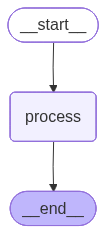

In [ ]:
# display graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
user_input = input("Enter: ")
while user_input != "exit":
  conversation_history.append(HumanMessage(content=user_input))
  result = agent.invoke({"messages": conversation_history})
  print(result["messages"])
  conversation_history = result["messages"]

  user_input = input("Enter (type exit to exit): ")


Enter: hi


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}